In [1]:
# !pip install geopandas==0.13.2 

import geopandas as gpd
import pandas as pd
import seaborn as sns
from shapely import Point

url = 'https://raw.githubusercontent.com/alura-cursos/curso_geopandas/main/dados/RJ_Municipios_2022.shp'
url2 = 'https://raw.githubusercontent.com/alura-cursos/curso_geopandas/main/dados/dados.csv'
url3 = 'https://github.com/allanspadini/curso_geopandas/raw/main/dados/metro.geojson'
url4 = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/trem.geojson'
url5 = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/brt.geojson'
url6 = 'Dados/Cobertura.geojson'

rj = gpd.read_file(url)
primary_data = pd.read_csv(url2, sep='\t')
rj_subway = gpd.read_file(url3)
rj_train = gpd.read_file(url4)
rj_brt = gpd.read_file(url5)
rj_beaches = gpd.read_file(url6)

print(rj.info())
rj.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    92 non-null     object  
 1   NM_MUN    92 non-null     object  
 2   SIGLA_UF  92 non-null     object  
 3   AREA_KM2  92 non-null     float64 
 4   geometry  92 non-null     geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 3.7+ KB
None


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


<AxesSubplot:>

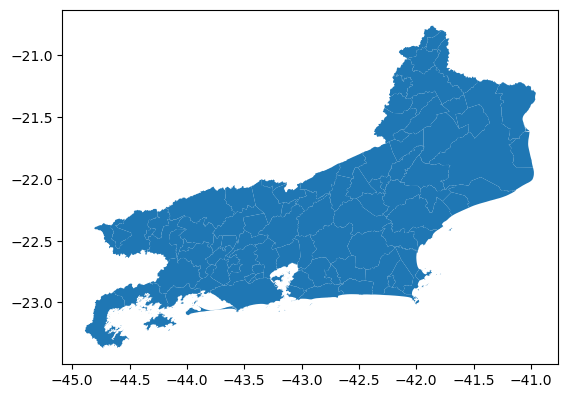

In [2]:
# Plotting the RJ geodataframe

rj.plot()

<AxesSubplot:>

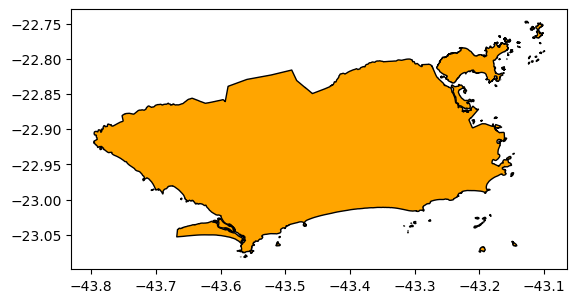

In [3]:
# Defining rj to be only the city RJ and not the state

rj = rj[rj['NM_MUN'] == 'Rio de Janeiro']
rj.to_file('RJ-MUN.shp')
rj.plot(color='orange', edgecolor='black')

In [4]:
primary_data.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [5]:
list(zip(primary_data['Longitude'], primary_data['Latitude']))

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.4775047, -23.0189271),
 (-43.2471087, -22.9335749),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.9225709),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982),
 (-43.1849587, -22.9706444),
 (-43.3548121, -23.0097423),
 (-49.0606445, -26.9225709),
 (-43.3461644, -22.938107),
 (-43.1819538, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.2808515, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.0191083),
 (-43.4590496, -23.023215),
 (-43.2339034, -22.9936095),
 (-43.1987716, -22.985368),
 (-43.2308106, -22.9771863),
 (-43.2525968, -22.9267666),
 (-51.92528, -14.235004),
 (-43.1852932, -22.9705243),
 (-43.4178323, -22.9990708),
 (-43.3079711, -23.0141101),
 (-43.350626, -22.988612),
 (-43.4152111, -22.9980081),
 (-43.199

In [6]:
gemotetric_points = [Point(x) for x in zip(primary_data['Longitude'], primary_data['Latitude'])]
gemotetric_points

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [7]:
# Creating a dataframe for the properties

crs = {'proj': 'latlong', 'ellps':'WGS84', 'datum': 'WGS84','no_defs':True}
data_geo = gpd.GeoDataFrame(primary_data, crs=crs, geometry = gemotetric_points)
data_geo.to_file('DATASET.shp')
data_geo

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


<AxesSubplot:>

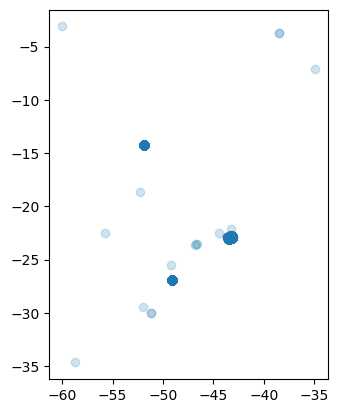

In [8]:
# Checking data_geo coordinates

data_geo.plot(alpha=0.2)

In [9]:
# Defining a crs for both data_geo and rj

rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
data_geo = data_geo.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<AxesSubplot:>

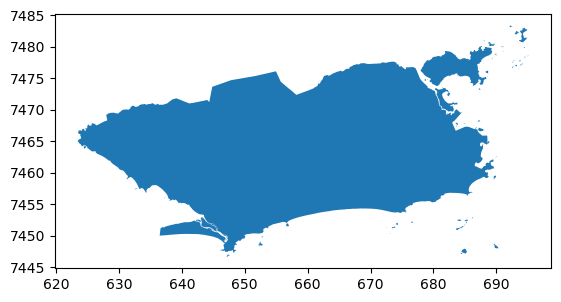

In [10]:
rj.plot()

In [11]:
# Checking if the position of the first property is inside the RJ state

print(data_geo.iloc[0].geometry.within(rj.iloc[0].geometry), data_geo.shape)

True (5000, 14)


In [12]:
# Removing non RJ properties

data_geo = data_geo[data_geo['geometry'].within(rj.iloc[0].geometry)]
data_geo.shape

(4513, 14)

<AxesSubplot:>

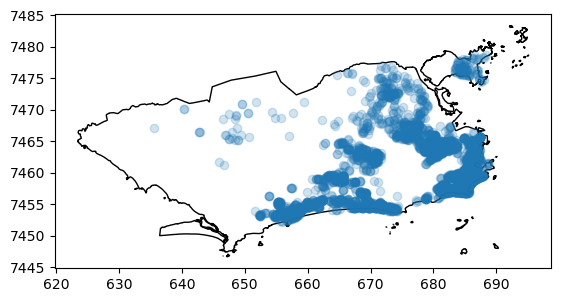

In [13]:
# Plotting the RJ state with properties

base = rj.plot(color='white',edgecolor='black')
data_geo.plot(ax=base, alpha=0.2)

In [14]:
# Checking subways informations

rj_subway.head()

,objectid,cod,nome,flg_atm,flg_bicicletario,flg_elevador,flg_linha1,flg_linha2,obs,flg_ativa,...,integra_trem,integra_onibus,integra_brt,corredor,integra_vlt,onibus,flg_metro_superficie,metro_superficie,data_inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36489 -22.80663)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35849 -22.81628)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34968 -22.82453)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34330 -22.83149)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33390 -22.84270)


<AxesSubplot:>

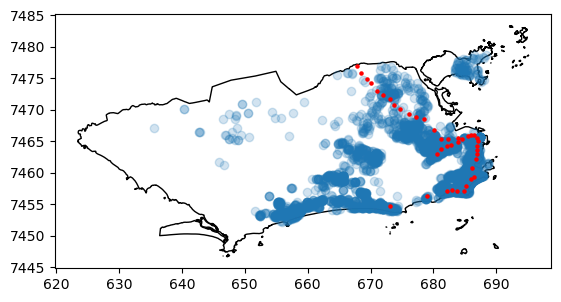

In [15]:
# Changing crs

rj_subway = rj_subway.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Setting it to the map

base = rj.plot(color='white',edgecolor='black')
data_geo.plot(ax=base, alpha=0.2)
rj_subway.plot(ax=base, color='red', markersize=5)

In [16]:
# Nearest subway for the first property

distances = rj_subway.distance(data_geo.iloc[0].geometry)
distances.min()

15.618532512237714

In [17]:
# Applying to all proeprties

data_geo['distance_subway'] = data_geo['geometry'].apply(lambda x: rj_subway.distance(x).min())
data_geo['distance_subway']

0       15.618533
1        7.530548
2        0.733846
3       10.714158
5       17.126742
          ...    
4995    20.663301
4996    18.184686
4997     2.176909
4998     2.555450
4999    15.465894
Name: distance_subway, Length: 4513, dtype: float64

<AxesSubplot:>

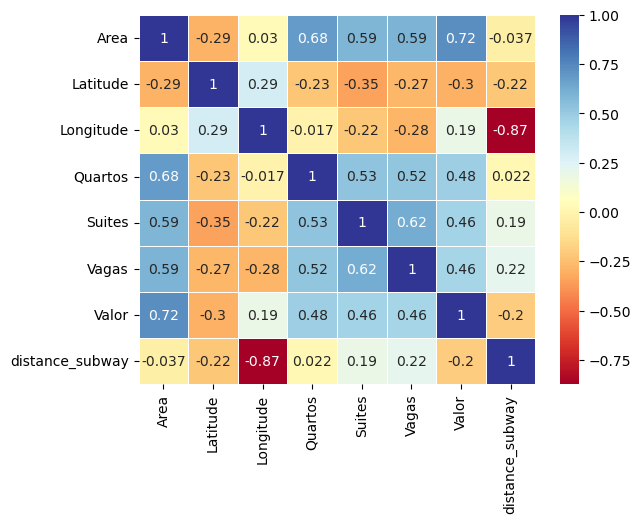

In [18]:
# Checking correlation between subway distance and price (valor column)

correlation = data_geo.corr()

# Creating heatmap

sns.heatmap(correlation, annot= True, cmap='RdYlBu', linewidth=0.5)

In [19]:
# Sincronyzing position of trains and brt

rj_train = rj_train.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
rj_brt = rj_brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Filtering

rj_train = rj_train[rj_train.within(rj.iloc[0].geometry)]
rj_brt = rj_brt[rj_brt.within(rj.iloc[0].geometry)]

<AxesSubplot:>

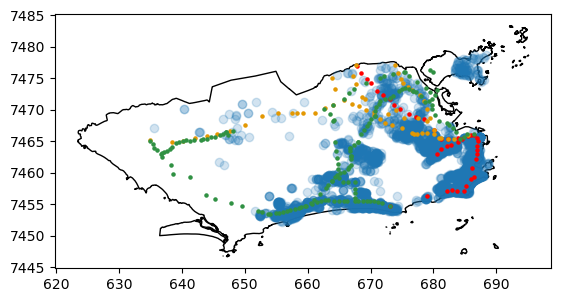

In [20]:
# Plotting

base = rj.plot(color='white',edgecolor='black')
data_geo.plot(ax=base, alpha=0.2)
rj_subway.plot(ax=base, color='red', markersize=5)
rj_train.plot(ax=base, color='#e39802',markersize=5)
rj_brt.plot(ax=base, color='#309143',markersize=5)

<AxesSubplot:>

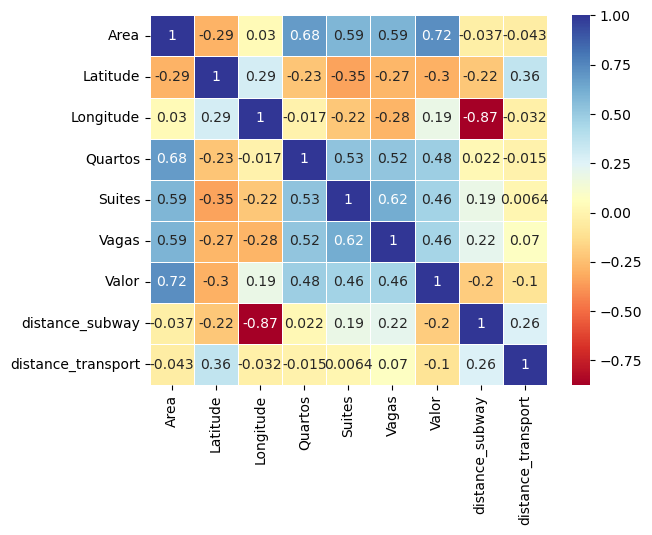

In [21]:
# Concat all transports to a variable and applying to a column

transports = pd.concat([rj_train.geometry, rj_subway.geometry, rj_brt.geometry], ignore_index = True)

data_geo['distance_transport'] = data_geo['geometry'].apply(lambda x: transports.distance(x).min())

# Checking correlation between subway, train, brt to distance and price (valor column)

correlation = data_geo.corr()

# Creating heatmap

sns.heatmap(correlation, annot= True, cmap='RdYlBu', linewidth=0.5)

<AxesSubplot:>

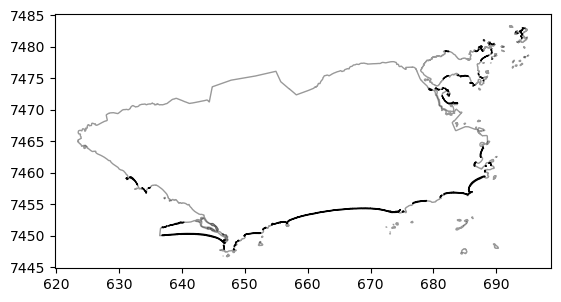

In [23]:
# Setting on crs

rj_beaches = rj_beaches.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Filtering for beaches

rj_beaches = rj_beaches[rj_beaches['classe'] == 'Praia']

# Checking beaches on state

base = rj.plot(color='white',edgecolor='black', alpha=0.4)
rj_beaches.plot(ax = base, color='white', edgecolor='black')

<AxesSubplot:>

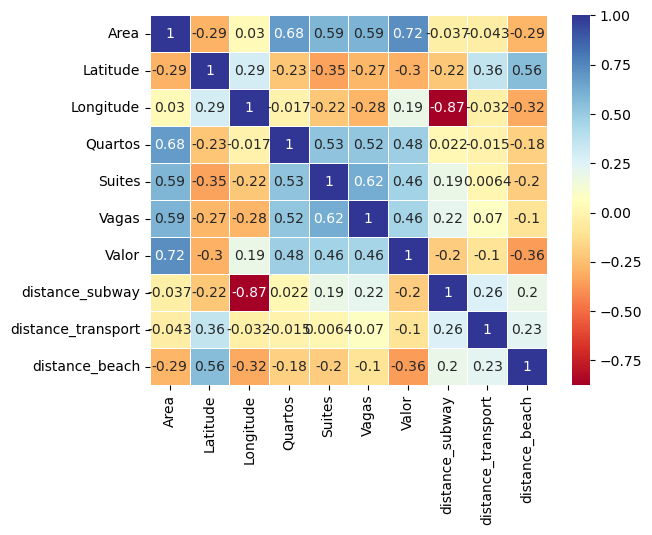

In [24]:
# Creating new column and check correlation

data_geo['distance_beach'] = data_geo['geometry'].apply(lambda x: rj_beaches.distance(x).min())

correlation = data_geo.corr()

# Creating heatmap

sns.heatmap(correlation, annot= True, cmap='RdYlBu', linewidth=0.5)

<AxesSubplot:xlabel='distance_beach', ylabel='Valor'>

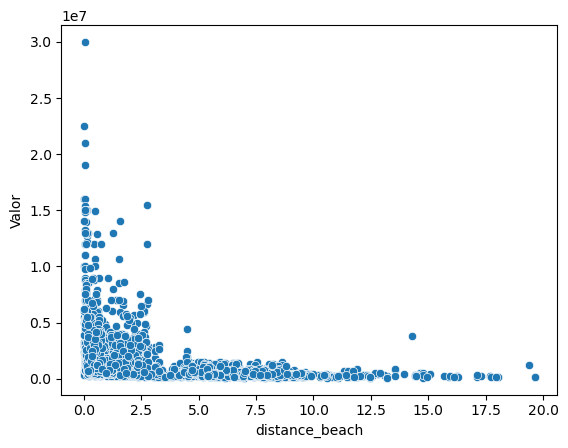

In [25]:
# Applying scatterplot

sns.scatterplot(x='distance_beach', y='Valor', data=data_geo)